### Query Final para la obtencion del DataFrame de Ventas

In [1]:
import sqlite3
import pandas as pd
import numpy as np

In [2]:
BD = 'BaseSQL.db'

conn = sqlite3.connect(BD)
cursor = conn.cursor()

cursor.execute('SELECT name FROM sqlite_master WHERE type = "table"')
tablas = cursor.fetchall()

for tabla in tablas:
    print(tabla[0])


customers
order_items
product_category_name_translation
order_payments
order_reviews
products
geolocation
orders
sellers
MasterVentas


In [3]:
query_final = """
  WITH Total_Pagos AS (
    SELECT
      pay.order_id,
      SUM(pay.payment_value) AS Total_Pago_Orden
    FROM "order_payments" pay
    GROUP BY pay.order_id
  )
SELECT
    o.order_purchase_timestamp AS "Fecha",
    o.order_id AS "Orden ID",
    o.customer_id AS "Cliente ID",
    c.customer_unique_id AS "Nombre del Cliente",
    c.customer_state AS "Ciudad Cliente",
    s.seller_id AS "Vendedor ID",
    s.seller_city AS "Ciudad Vendedor",
    i.product_id AS "Producto ID",
    p.product_category_name AS "Categoria Producto",
    p.product_weight_g AS "Peso Producto g",
    (p.product_length_cm * p.product_height_cm * p.product_width_cm)  AS "Volumen Producto cm3",
    p.product_photos_qty AS "Fotos Producto",
    i.price AS "Precio Unitario",
    i.order_item_id AS "Cantidad",
    (i.order_item_id * i.price) AS "Subtotal Orden",
    i.freight_value AS "Costo Flete",
    (i.order_item_id * i.price) + i.freight_value AS "Total Orden",
    tp.Total_Pago_Orden AS "Total Pago Orden",
    (JULIANDAY(o.order_estimated_delivery_date) - JULIANDAY(o.order_purchase_timestamp)) AS "Tiempo Entrega Estimado (Dias)",
    o.order_status AS "Estado Orden",
    r.review_score AS "Calificacion"


  FROM "orders" o
  JOIN "order_items" i ON o.order_id = i.order_id
  JOIN "order_payments" pay ON o.order_id = pay.order_id
  JOIN "customers" c ON o.customer_id = c.customer_id
  JOIN "sellers" s ON i.seller_id = s.seller_id
  JOIN "products" p ON i.product_id = p.product_id
  LEFT JOIN "order_reviews" r ON o.order_id = r.order_id
  JOIN Total_Pagos tp ON o.order_id = tp.order_id
  GROUP BY o.order_id, i.product_id;
  """


Ventas_DF = pd.read_sql_query(query_final, conn)
Ventas_DF.sort_values(by='Cantidad', ascending=False).head()

,Fecha,Orden ID,Cliente ID,Nombre del Cliente,Ciudad Cliente,Vendedor ID,Ciudad Vendedor,Producto ID,Categoria Producto,Peso Producto g,...,Fotos Producto,Precio Unitario,Cantidad,Subtotal Orden,Costo Flete,Total Orden,Total Pago Orden,Tiempo Entrega Estimado (Dias),Estado Orden,Calificacion
52029,2017-07-16 18:19:25,8272b63d03f5f79c56e9e4120aec44ef,fc3d1daec319d62d49bfb5e1f83123e9,4546caea018ad8c692964e3382debd19,SP,2709af9587499e95e803a6498a5a56e9,sao paulo,79ce45dbc2ea29b22b5a261bbb7b7ee7,beleza_saude,1000.0,...,2.0,7.8,21,163.8,6.57,170.37,196.11,11.236516,delivered,1.0
39714,2018-04-17 21:08:59,637617b3ffe9e2f7a2411243829226d0,daf15f1b940cc6a72ba558f093dc00dd,37bc3d463e2a0024012a7fa587597a3c,SC,1f50f920176fa81dab994f9023523100,sao jose do rio preto,bf44071ef18f5c9ded039681c68b1996,bebes,6050.0,...,2.0,79.9,10,799.0,24.02,823.02,1246.97,29.118762,delivered,4.0
80870,2018-08-12 02:11:20,ca3625898fbd48669d50701aba51cd5f,0d861a5e4dd6a9079d89e1330848f0ab,c8ed31310fc440a3f8031b177f9842c3,SP,0b35c634521043bf4b47e21547b99ab5,teixeira soares,309dd69eb83cea38c51709d62befe1a4,construcao_ferramentas_construcao,2150.0,...,1.0,56.0,9,504.0,3.68,507.68,1157.28,31.908796,delivered,3.0
80869,2018-08-12 02:11:20,ca3625898fbd48669d50701aba51cd5f,0d861a5e4dd6a9079d89e1330848f0ab,c8ed31310fc440a3f8031b177f9842c3,SP,0b35c634521043bf4b47e21547b99ab5,teixeira soares,21b524c4c060169fa75ccf08c7da4627,construcao_ferramentas_construcao,3350.0,...,1.0,63.7,8,509.6,0.15,509.75,1157.28,31.908796,delivered,3.0
36029,2017-10-17 13:06:29,5a3b1c29a49756e75f1ef513383c0c12,be1c4e52bb71e0c54b11a26b8e8d59f2,d97b3cfb22b0d6b25ac9ed4e9c2d481b,SP,d2374cbcbb3ca4ab1086534108cc3ab7,ibitinga,e95fb3a80ca294f39de925b6428f3a32,cama_mesa_banho,1300.0,...,1.0,78.9,8,631.2,7.98,639.18,853.95,16.453831,delivered,1.0


In [4]:
Ventas_DF.info()

<class 'pandas.DataFrame'>
RangeIndex: 102424 entries, 0 to 102423
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Fecha                           102424 non-null  str    
 1   Orden ID                        102424 non-null  str    
 2   Cliente ID                      102424 non-null  str    
 3   Nombre del Cliente              102424 non-null  str    
 4   Ciudad Cliente                  102424 non-null  str    
 5   Vendedor ID                     102424 non-null  str    
 6   Ciudad Vendedor                 102424 non-null  str    
 7   Producto ID                     102424 non-null  str    
 8   Categoria Producto              100964 non-null  str    
 9   Peso Producto g                 102408 non-null  float64
 10  Volumen Producto cm3            102408 non-null  float64
 11  Fotos Producto                  100964 non-null  float64
 12  Precio Unitario            

In [5]:
Ventas_DF.isnull().sum()

Fecha                                0
Orden ID                             0
Cliente ID                           0
Nombre del Cliente                   0
Ciudad Cliente                       0
Vendedor ID                          0
Ciudad Vendedor                      0
Producto ID                          0
Categoria Producto                1460
Peso Producto g                     16
Volumen Producto cm3                16
Fotos Producto                    1460
Precio Unitario                      0
Cantidad                             0
Subtotal Orden                       0
Costo Flete                          0
Total Orden                          0
Total Pago Orden                     0
Tiempo Entrega Estimado (Dias)       0
Estado Orden                         0
Calificacion                       797
dtype: int64

In [6]:
Ventas_DF.dropna(inplace=True)

In [7]:
Ventas_DF['Categoria Producto'].nunique()

73

In [8]:
Ventas_DF.duplicated().sum()

np.int64(0)

### Creamos la Variable Sintetica Tiempo de Reposicion de un Producto basado en su Categoria.

In [9]:
categorias = list((Ventas_DF['Categoria Producto'].unique()))
np.random.seed(42)
lead_time_rep = {c: np.random.randint(1,91) for c in categorias} #Se asume un tiempo de reposicion maximo de 90 dias.
lead_time_rep

{'cool_stuff': 52,
 'pet_shop': 15,
 'moveis_decoracao': 72,
 'perfumaria': 61,
 'ferramentas_jardim': 21,
 'utilidades_domesticas': 83,
 'telefonia': 87,
 'beleza_saude': 75,
 'livros_tecnicos': 75,
 'fashion_bolsas_e_acessorios': 88,
 'cama_mesa_banho': 24,
 'esporte_lazer': 3,
 'consoles_games': 22,
 'moveis_escritorio': 53,
 'malas_acessorios': 2,
 'alimentos': 88,
 'agro_industria_e_comercio': 30,
 'eletronicos': 38,
 'informatica_acessorios': 2,
 'construcao_ferramentas_construcao': 64,
 'audio': 60,
 'bebes': 21,
 'construcao_ferramentas_iluminacao': 33,
 'brinquedos': 76,
 'papelaria': 58,
 'industria_comercio_e_negocios': 22,
 'relogios_presentes': 89,
 'automotivo': 49,
 'eletrodomesticos': 59,
 'moveis_cozinha_area_de_servico_jantar_e_jardim': 42,
 'climatizacao': 60,
 'casa_conforto': 80,
 'telefonia_fixa': 15,
 'portateis_casa_forno_e_cafe': 62,
 'fraldas_higiene': 62,
 'sinalizacao_e_seguranca': 47,
 'instrumentos_musicais': 62,
 'eletroportateis': 51,
 'construcao_ferram

In [10]:
#Mapeamos el Tiempo de Reposicion por Categorias de Producto en Ventas_DF
Ventas_DF['Tiempo de Reposicion'] = Ventas_DF['Categoria Producto'].map(lead_time_rep)
display(Ventas_DF[['Producto ID', 'Categoria Producto', 'Tiempo de Reposicion']].head())

,Producto ID,Categoria Producto,Tiempo de Reposicion
0,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,52
1,e5f2d52b802189ee658865ca93d83a8f,pet_shop,15
2,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,72
3,7634da152a4610f1595efa32f14722fc,perfumaria,61
4,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,21


In [11]:
#Reagrupacion para definicion de Stock de Seguridad, Stock Minimo y Parametros Asociados
products = Ventas_DF.groupby('Producto ID').agg(
    Cantidad_Media = ('Cantidad', 'mean'),
    Cantidad_Desviacion = ('Cantidad', 'std'),
    Tiempo_de_Reposicion = ('Tiempo de Reposicion', 'first')
).reset_index()

products.head()


,Producto ID,Cantidad_Media,Cantidad_Desviacion,Tiempo_de_Reposicion
0,00066f42aeeb9f3007548bb9d3f33c38,1.0,NaN,61
1,00088930e925c41fd95ebfe695fd2655,1.0,NaN,49
2,0009406fd7479715e4bef61dd91f2462,1.0,NaN,24
3,000b8f95fcb9e0096488278317764d19,1.0,0.0,83
4,000d9be29b5207b54e86aa1b1ac54872,1.0,NaN,89


In [12]:
#Rellenamos los Valores NaN de Desviacion de Cantidades Vendidas con 0

products['Cantidad_Desviacion'] = products['Cantidad_Desviacion'].fillna(0, inplace=True)
products.head()

/tmp/ipykernel_47018/2430440572.py:3: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  products['Cantidad_Desviacion'] = products['Cantidad_Desviacion'].fillna(0, inplace=True)


,Producto ID,Cantidad_Media,Cantidad_Desviacion,Tiempo_de_Reposicion
0,00066f42aeeb9f3007548bb9d3f33c38,1.0,0.0,61
1,00088930e925c41fd95ebfe695fd2655,1.0,0.0,49
2,0009406fd7479715e4bef61dd91f2462,1.0,0.0,24
3,000b8f95fcb9e0096488278317764d19,1.0,0.0,83
4,000d9be29b5207b54e86aa1b1ac54872,1.0,0.0,89


In [13]:
# Definicion de Stock Minimo, Stock de Seguridad y Parametros Asociados:

# Nivel de Servicio o Intervalos de Confianza (Logistica Avanzada)
Z_dict = {
    'A': 2.33, #Producto de Alta Rotacion 99% de Confianza
    'B': 1.645, #Producto de Media Rotacion 95% de Confianza
    'C': 1.282   #Producto de Baja Rotacion 80% de Confianza
}

# Se iniciara el calculo del Stock Minimo con un intervalo de Confianza estandar de 95% para luego ajustarlo segun sea la Clasificacion del Producto con Z_dict

#Stock de Seguridad y Stock Minimo
z = Z_dict['B']
products['Stock de Seguridad'] = z * products['Cantidad_Desviacion']* np.sqrt(products['Tiempo_de_Reposicion'])
products['Stock Minimo'] = (products['Cantidad_Media']* products['Tiempo_de_Reposicion']) + products['Stock de Seguridad']

products.sort_values('Cantidad_Media', ascending= False).head()


,Producto ID,Cantidad_Media,Cantidad_Desviacion,Tiempo_de_Reposicion,Stock de Seguridad,Stock Minimo
15440,79ce45dbc2ea29b22b5a261bbb7b7ee7,21.0,0.0,75,0.0,1575.0
24010,bf44071ef18f5c9ded039681c68b1996,10.0,0.0,21,0.0,210.0
26247,d05bb6074b45c20f7a516c239c0a1c43,7.0,0.0,15,0.0,105.0
12330,61b6e5d2e3ee58d2b341b8ef1a652b26,7.0,0.0,24,0.0,168.0
26490,d25bbb182b51d1594fe3b54a27ae143e,7.0,0.0,24,0.0,168.0


In [14]:
products.shape

(32183, 6)

In [15]:
#Clasificacion de Producto por Volumen de Ventas en Cantidad basado en el pareto de las ventas

products = products.sort_values('Cantidad_Media', ascending=False)

#Porcentaje Acumulado sobre el total de unidades vendidas
unidades_vendidas = products['Cantidad_Media'].sum()
products['Porcentaje Acumulado'] = products['Cantidad_Media'].cumsum() / unidades_vendidas

#Definicion de la funcion de ClasificacionABC A: Alta Rotacion, B: Rotacion Media, C: Baja Rotacion
def ClasificacionABC(PorcentajeAcumulado):
    """
    Asigna la categoria de rotacion basada en el porcentaje acumulado por unidades vendidas.
    """
    if PorcentajeAcumulado <= 0.8:
        return 'A'
    elif PorcentajeAcumulado <= 0.95:
        return 'B'
    else:
        return 'C'

#ClasificacionABC (Variable Objetivo)
products['ClasificacionABC'] = products['Porcentaje Acumulado'].apply(ClasificacionABC)

products.head()

,Producto ID,Cantidad_Media,Cantidad_Desviacion,Tiempo_de_Reposicion,Stock de Seguridad,Stock Minimo,Porcentaje Acumulado,ClasificacionABC
15440,79ce45dbc2ea29b22b5a261bbb7b7ee7,21.0,0.0,75,0.0,1575.0,0.000613,A
24010,bf44071ef18f5c9ded039681c68b1996,10.0,0.0,21,0.0,210.0,0.000905,A
26247,d05bb6074b45c20f7a516c239c0a1c43,7.0,0.0,15,0.0,105.0,0.001110,A
12330,61b6e5d2e3ee58d2b341b8ef1a652b26,7.0,0.0,24,0.0,168.0,0.001314,A
26490,d25bbb182b51d1594fe3b54a27ae143e,7.0,0.0,24,0.0,168.0,0.001519,A


In [16]:
print(products['ClasificacionABC'].value_counts())

ClasificacionABC
A    25334
B     5136
C     1713
Name: count, dtype: int64


### Integramos la Variable Objetivo de ClasificacionABC al DataFrame de Ventas_DF

In [17]:
#1. Merge Estrategico
MasterVentas = Ventas_DF.merge(products[['Producto ID', 'ClasificacionABC']], on='Producto ID', how='inner')
MasterVentas.head()

#Optimizacion de Memoria
MasterVentas['ClasificacionABC'] = MasterVentas['ClasificacionABC'].astype('category')
MasterVentas.info()

#Guardamos el MasterVentas en la Base de Datos SQL para su posterior uso en el desarrollo del Modelo de Prediccion de Demanda y Recomendacion de Pedidos a Proveedores
MasterVentas.to_sql('MasterVentas', conn, if_exists='replace', index=False)


<class 'pandas.DataFrame'>
RangeIndex: 100178 entries, 0 to 100177
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   Fecha                           100178 non-null  str     
 1   Orden ID                        100178 non-null  str     
 2   Cliente ID                      100178 non-null  str     
 3   Nombre del Cliente              100178 non-null  str     
 4   Ciudad Cliente                  100178 non-null  str     
 5   Vendedor ID                     100178 non-null  str     
 6   Ciudad Vendedor                 100178 non-null  str     
 7   Producto ID                     100178 non-null  str     
 8   Categoria Producto              100178 non-null  str     
 9   Peso Producto g                 100178 non-null  float64 
 10  Volumen Producto cm3            100178 non-null  float64 
 11  Fotos Producto                  100178 non-null  float64 
 12  Precio Unitar

100178

### Segmentamos Master Ventas por Clasificacion de Rotacion

In [18]:
ClassA = MasterVentas[MasterVentas['ClasificacionABC'] == 'A'].copy()
ClassB = MasterVentas[MasterVentas['ClasificacionABC'] == 'B'].copy()
ClassC = MasterVentas[MasterVentas['ClasificacionABC'] == 'C'].copy()

#Agrupamos por Categoria y Fecha para la Prediccion en el Dashboard Ejecutivo de Ventas
CategoriasA = ClassA.groupby(['Categoria Producto', 'Fecha'])['Cantidad'].sum().reset_index()
CategoriasB = ClassB.groupby(['Categoria Producto', 'Fecha'])['Cantidad'].sum().reset_index()
CategoriasC = ClassC.groupby(['Categoria Producto', 'Fecha'])['Cantidad'].sum().reset_index()

print(CategoriasA['Categoria Producto'].nunique())
print(CategoriasB['Categoria Producto'].nunique())
print(CategoriasC['Categoria Producto'].nunique())

73
70
65


In [19]:
#Visualizamos las categorias con mayor numero de articulos vendidos para cada Clase

CategoriasA.groupby('Categoria Producto')['Cantidad'].sum().sort_values(ascending=False)

Categoria Producto
cama_mesa_banho                                  9738
beleza_saude                                     7566
esporte_lazer                                    6283
informatica_acessorios                           6275
moveis_decoracao                                 6270
                                                 ... 
la_cuisine                                         11
portateis_cozinha_e_preparadores_de_alimentos      10
pc_gamer                                            7
fashion_roupa_infanto_juvenil                       5
seguros_e_servicos                                  1
Name: Cantidad, Length: 73, dtype: int64

In [20]:
CategoriasB.groupby('Categoria Producto')['Cantidad'].sum().sort_values(ascending=False)

Categoria Producto
beleza_saude             1281
esporte_lazer            1216
cama_mesa_banho           972
moveis_decoracao          801
utilidades_domesticas     799
                         ... 
fashion_esporte             2
pc_gamer                    2
la_cuisine                  2
casa_conforto_2             1
seguros_e_servicos          1
Name: Cantidad, Length: 70, dtype: int64

In [21]:
CategoriasC.groupby('Categoria Producto')['Cantidad'].sum().sort_values(ascending=False)

Categoria Producto
esporte_lazer                                    512
cama_mesa_banho                                  427
beleza_saude                                     380
utilidades_domesticas                            311
cool_stuff                                       287
                                                ... 
artigos_de_festas                                  1
fashion_esporte                                    1
cine_foto                                          1
flores                                             1
portateis_cozinha_e_preparadores_de_alimentos      1
Name: Cantidad, Length: 65, dtype: int64

### Analizamos la Densidad y Estacionalidad por Categoria de Producto

In [22]:
#Calculo de densidad de Ventas

#1. Ajuste de formato y normalizacion
ClassA['Fecha'] = pd.to_datetime(ClassA['Fecha']).dt.normalize()
ClassB['Fecha'] = pd.to_datetime(ClassB['Fecha']).dt.normalize()
ClassC['Fecha'] = pd.to_datetime(ClassC['Fecha']).dt.normalize()

#2. Rango total de ventas en el dataset
inicioA = ClassA['Fecha'].min()
finA = ClassA['Fecha'].max()
totalA = (finA - inicioA).days

inicioB = ClassB['Fecha'].min()
finB = ClassB['Fecha'].max()
totalB = (finB - inicioB).days

inicioC = ClassC['Fecha'].min()
finC = ClassC['Fecha'].max()
totalC = (finC - inicioC).days

#%Densidad
DensidadA = ClassA.groupby('Categoria Producto').agg(
    Dias_Con_Ventas = ('Fecha', 'nunique'),
    Ventas = ('Cantidad', 'sum')
).reset_index()

DensidadB = ClassB.groupby('Categoria Producto').agg(
    Dias_Con_Ventas = ('Fecha', 'nunique'),
    Ventas = ('Cantidad', 'sum')
).reset_index()

DensidadC = ClassC.groupby('Categoria Producto').agg(
    Dias_Con_Ventas = ('Fecha', 'nunique'),
    Ventas = ('Cantidad', 'sum')
).reset_index()


DensidadA['%Densidad'] = (DensidadA['Dias_Con_Ventas'] / totalA) * 100
DensidadB['%Densidad'] = (DensidadB['Dias_Con_Ventas'] / totalB) * 100
DensidadC['%Densidad'] = (DensidadC['Dias_Con_Ventas'] / totalC) * 100


#Categorias mas importantes por %Densidad
TopCatA = DensidadA.loc[DensidadA['%Densidad'] >= 70 ].sort_values('%Densidad', ascending=False).reset_index()
TopCatA.drop('index', axis=1, inplace=True)

TopCatB = DensidadB.loc[DensidadB['%Densidad'] >= 45 ].sort_values('%Densidad', ascending=False).reset_index()
TopCatB.drop('index', axis=1, inplace=True)

TopCatC = DensidadC.loc[DensidadC['%Densidad'] >= 25 ].sort_values('%Densidad', ascending=False).reset_index()
TopCatC.drop('index', axis=1, inplace=True)

In [23]:
TopCatA

,Categoria Producto,Dias_Con_Ventas,Ventas,%Densidad
0,moveis_decoracao,607,6270,83.264746
1,esporte_lazer,600,6283,82.304527
2,beleza_saude,599,7566,82.167353
3,cama_mesa_banho,597,9738,81.893004
4,informatica_acessorios,590,6275,80.932785
5,telefonia,582,3559,79.835391
6,brinquedos,581,3401,79.698217
7,utilidades_domesticas,580,5105,79.561043
8,cool_stuff,574,2842,78.737997
9,automotivo,573,3290,78.600823


In [24]:
TopCatB

,Categoria Producto,Dias_Con_Ventas,Ventas,%Densidad
0,esporte_lazer,460,1216,66.282421
1,beleza_saude,458,1281,65.994236
2,cama_mesa_banho,432,972,62.247839
3,moveis_decoracao,417,801,60.086455
4,utilidades_domesticas,387,799,55.763689
5,relogios_presentes,361,673,52.017291
6,telefonia,349,651,50.288184
7,cool_stuff,346,559,49.855908
8,brinquedos,334,564,48.126801
9,informatica_acessorios,332,611,47.838617


In [25]:
TopCatC

,Categoria Producto,Dias_Con_Ventas,Ventas,%Densidad
0,esporte_lazer,289,512,41.702742
1,cama_mesa_banho,274,427,39.538240
2,beleza_saude,252,380,36.363636
3,utilidades_domesticas,222,311,32.034632
4,informatica_acessorios,184,228,26.551227
5,moveis_decoracao,182,236,26.262626
6,automotivo,176,263,25.396825


In [26]:
# Analisis de Outliers
MasterVentas['Fecha'] = pd.to_datetime(MasterVentas['Fecha']).dt.normalize()
OutlierDF = MasterVentas.groupby(['ClasificacionABC', 'Categoria Producto','Fecha'])['Cantidad'].sum().reset_index()
OutlierDF.sort_values('Cantidad', ascending=False).head(10)

,ClasificacionABC,Categoria Producto,Fecha,Cantidad
3752,A,cama_mesa_banho,2017-11-24,189
9444,A,ferramentas_jardim,2017-11-24,92
3753,A,cama_mesa_banho,2017-11-25,87
12357,A,moveis_decoracao,2017-11-24,85
2573,A,beleza_saude,2017-11-24,73
16123,A,telefonia,2017-11-24,62
7980,A,esporte_lazer,2017-11-24,59
3161,A,brinquedos,2017-11-24,59
10185,A,informatica_acessorios,2017-11-24,59
15379,A,relogios_presentes,2017-11-24,57


/tmp/ipykernel_47018/27057430.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=OutlierDF, x='ClasificacionABC', y='Cantidad', palette='viridis')


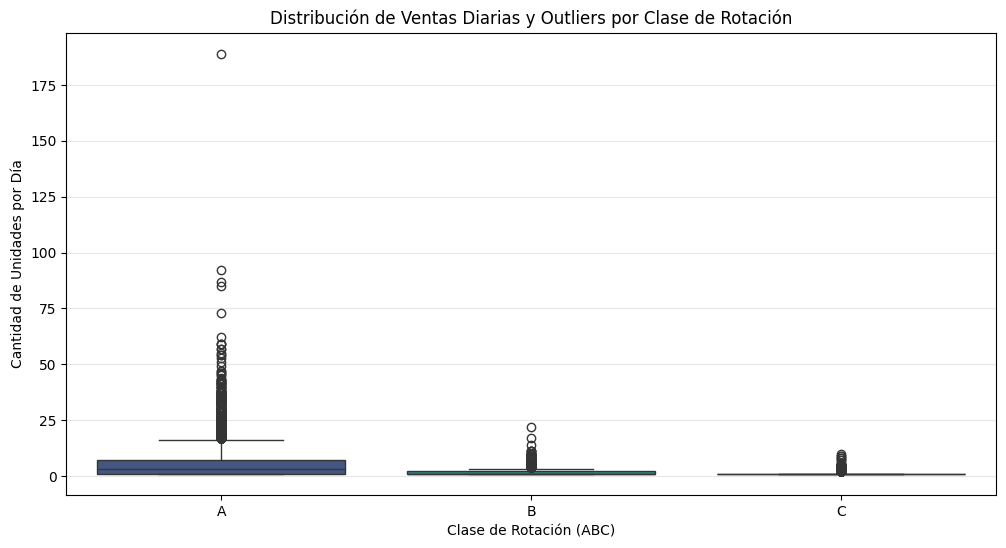

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=OutlierDF, x='ClasificacionABC', y='Cantidad', palette='viridis')
plt.title('Distribución de Ventas Diarias y Outliers por Clase de Rotación')
plt.ylabel('Cantidad de Unidades por Día')
plt.xlabel('Clase de Rotación (ABC)')
plt.grid(axis='y', alpha=0.3)
plt.show()

Se imputa el valor atipico en la Clase A para evitar que el modelo ajuste la curva a un dato no recurrente.

In [28]:
OutlierDF = OutlierDF.loc[OutlierDF['Cantidad'] <= 100]
OutlierDF.sort_values('Cantidad', ascending=False).head(10)

,ClasificacionABC,Categoria Producto,Fecha,Cantidad
9444,A,ferramentas_jardim,2017-11-24,92
3753,A,cama_mesa_banho,2017-11-25,87
12357,A,moveis_decoracao,2017-11-24,85
2573,A,beleza_saude,2017-11-24,73
16123,A,telefonia,2017-11-24,62
7980,A,esporte_lazer,2017-11-24,59
3161,A,brinquedos,2017-11-24,59
10185,A,informatica_acessorios,2017-11-24,59
14281,A,perfumaria,2017-11-24,57
15379,A,relogios_presentes,2017-11-24,57


/tmp/ipykernel_47018/1122077693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=OutlierDF, x='ClasificacionABC', y='Cantidad', palette='viridis')


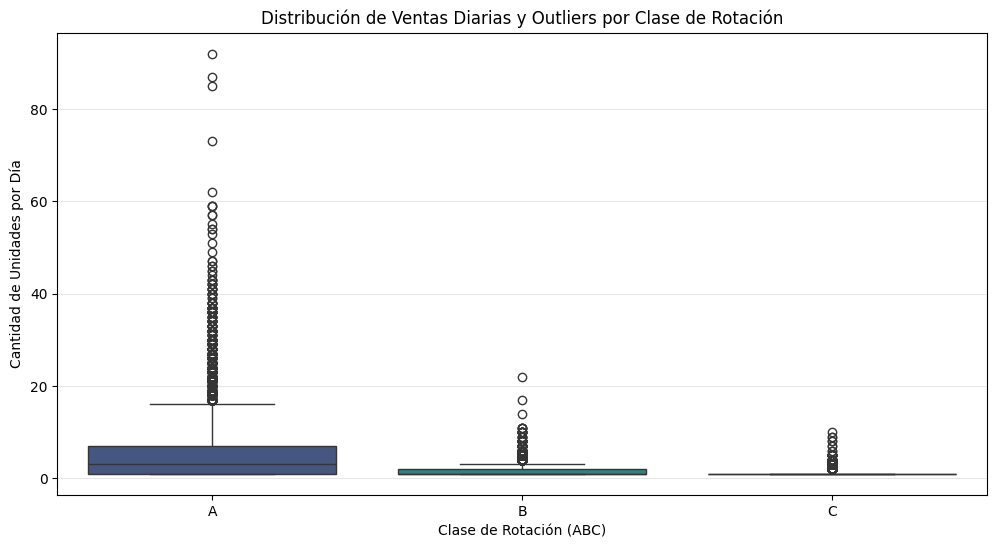

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=OutlierDF, x='ClasificacionABC', y='Cantidad', palette='viridis')
plt.title('Distribución de Ventas Diarias y Outliers por Clase de Rotación')
plt.ylabel('Cantidad de Unidades por Día')
plt.xlabel('Clase de Rotación (ABC)')
plt.grid(axis='y', alpha=0.3)
plt.show()

In [30]:
ClassA['Cantidad'].describe()

count    82590.000000
mean         1.056048
std          0.304339
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         21.000000
Name: Cantidad, dtype: float64

In [31]:
ClassB['Cantidad'].describe()

count    13245.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: Cantidad, dtype: float64

In [32]:
ClassC['Cantidad'].describe()

count    4343.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Cantidad, dtype: float64

### Analisis de Estacionalidad Visual

In [33]:
# Seleccionamos una categoría líder por cada clase
cats_representativas = OutlierDF.sort_values('Cantidad', ascending=False).groupby('ClasificacionABC')['Categoria Producto'].first().reset_index()['Categoria Producto'].tolist()
cats_representativas

['ferramentas_jardim', 'cama_mesa_banho', 'cool_stuff']

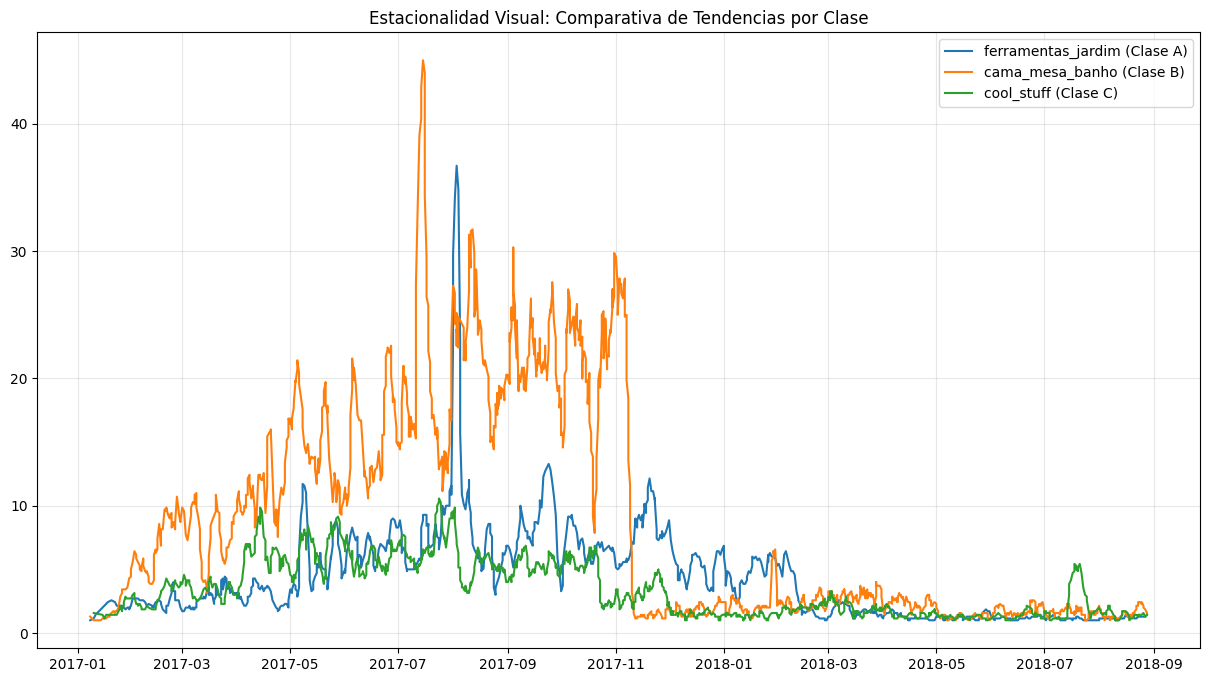

In [34]:
plt.figure(figsize=(15, 8))

Rt = ['A', 'B', 'C']
OutlierDF['Fecha'] = pd.to_datetime(OutlierDF['Fecha']) #Normalizacion de las Fechas para grafico de estacionalidad
for i, cat in enumerate(cats_representativas):
    subset = OutlierDF[OutlierDF['Categoria Producto'] == cat]
    # Aplicamos media móvil para limpiar el ruido y ver la "forma" de la estacionalidad
    plt.plot(subset['Fecha'].sort_values(), subset['Cantidad'].rolling(7).mean(), label=f"{cat} (Clase {Rt[i]})")

plt.title('Estacionalidad Visual: Comparativa de Tendencias por Clase')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [37]:
#Guardamos los DataFrames en Interim
MasterVentas.to_csv('/workspaces/Proyecto_Final_Close-Loop-Intelligence/data/interim/MasterVentas.csv', index=False)
products.to_csv('/workspaces/Proyecto_Final_Close-Loop-Intelligence/data/interim/Products.csv', index=False)
Ventas_DF.to_csv('/workspaces/Proyecto_Final_Close-Loop-Intelligence/data/interim/Ventas_DF.csv', index=False)
ClassA.to_csv('/workspaces/Proyecto_Final_Close-Loop-Intelligence/data/interim/ClassA.csv', index=False)
ClassB.to_csv('/workspaces/Proyecto_Final_Close-Loop-Intelligence/data/interim/ClassB.csv', index=False)
ClassC.to_csv('/workspaces/Proyecto_Final_Close-Loop-Intelligence/data/interim/ClassC.csv', index=False)

TopA = TopCatA['Categoria Producto'].head(15)
TopB = TopCatB['Categoria Producto'].head(10)
TopC = TopCatC['Categoria Producto'].head(5)

TopA.to_csv('/workspaces/Proyecto_Final_Close-Loop-Intelligence/data/interim/TopA.csv', index=False)
TopB.to_csv('/workspaces/Proyecto_Final_Close-Loop-Intelligence/data/interim/TopB.csv', index=False)
TopC.to_csv('/workspaces/Proyecto_Final_Close-Loop-Intelligence/data/interim/TopC.csv', index=False)